General idea here is that we will simulate the system with a higher order model whereas the model used for filtering and control is a simplified electromechanical model.

In [21]:
%matplotlib inline  
import motor_compare as motor
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [22]:
# motor paremeters (single cage)
ra = 0.0138
xa = 0.083
xm = 3.0
r1 = 0.055
x1 = 0.053
H  = 1.0
D  = 1.0

In [23]:
# create a voltage 'perturbance'
tend = 3.0

# this data is taken from the 2-bus sytem example, we use pelec to initialize the motor
v_ds   = 1.0144
v_qs   = -0.0589
pelec  = 1.06484

steps = 1000
time  = np.linspace(0,tend,steps)
volt  = np.zeros((2, steps))

for i in range(len(time)):
    if (time[i] > 0.1) and (time[i] < 0.4):
        volt[0,i] = v_ds * 0.6
        volt[1,i] = v_qs * 0.6
    else:
        volt[0, i] = v_ds
        volt[1, i] = v_qs

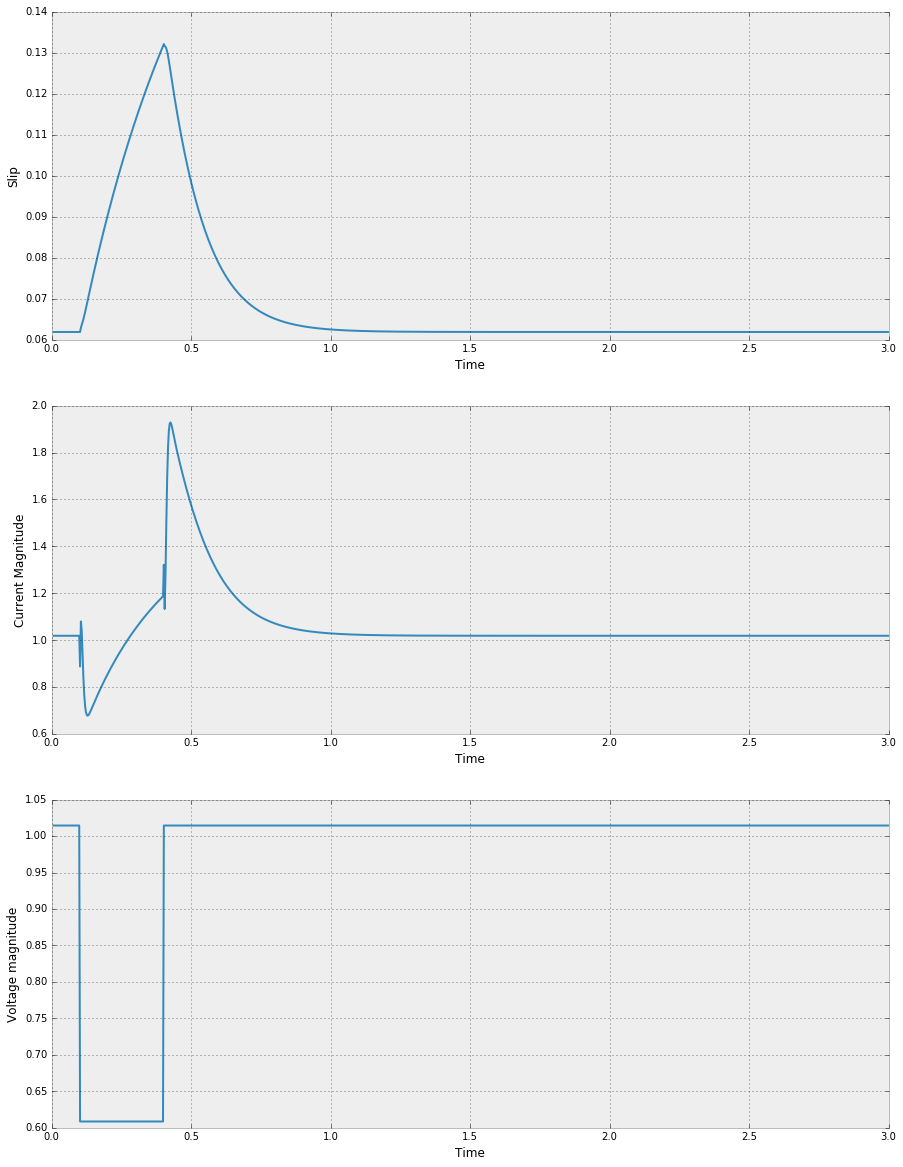

In [24]:
# initialize cim5 and integrate

dim_a      = 5 #number of df
motor_a    = motor.cim5(ra, xa, xm, r1, x1, H, D)

x0          = np.ones(dim_a + 1)
sol         = optimize.root(motor_a.initialize, x0, args = (v_ds, v_qs, pelec))
motor_a.t_m = sol.x[5] #set mechanical torque with initialization results

x_a        = np.zeros((dim_a, steps))
x_a[:,0]   = sol.x[0:dim_a]
    

for i in range(len(time) - 1):
    motor_a.propagate(time[1], x_a[:, i], x_a[:, i + 1], volt[0, i + 1],
        volt[1, i + 1])
    
plt.figure(figsize=[15,20])
plt.subplot(3, 1, 1)
plt.plot(time, x_a[2,:])
plt.ylabel('Slip')
plt.xlabel('Time')

plt.subplot(3, 1, 2)
plt.plot(time, np.abs(x_a[3, :]) + 1j*x_a[4, :])
plt.ylabel('Current Magnitude')
plt.xlabel('Time')

plt.subplot(3, 1, 3)
plt.plot(time, np.abs(volt[0, :]) + 1j*volt[1, :])
plt.ylabel('Voltage magnitude')
plt.xlabel('Time')

    

We can initialize the electromechanical model with same paremeters and integrate it. There is an inherent *bias*
due to how the model is formulated.

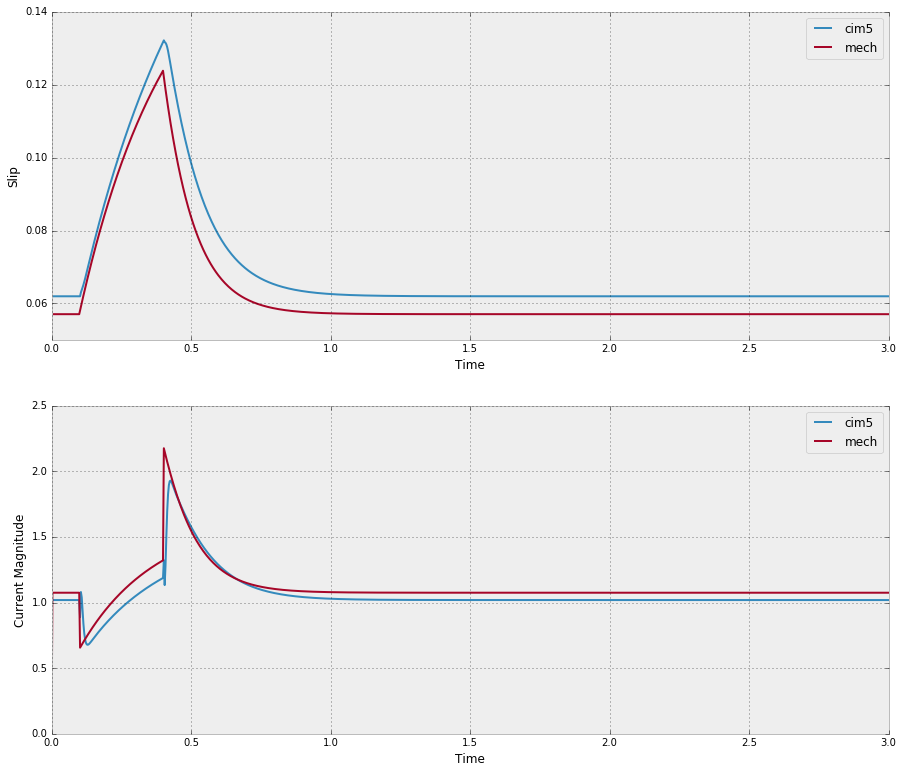

In [25]:
motor_b = motor.mech(ra, xa, xm, r1, x1, H)

x0    = np.ones(2)
x0[0] = 0.1 #initial guess so N-R converges
sol   = optimize.root(motor_b.initialize, x0, args = (v_ds, v_qs, pelec))

x_b      = np.zeros((3, steps))
x_b[:,0] = sol.x[0:1]
    
motor_b.t_m = sol.x[1]

for i in range(len(time) - 1):
    motor_b.propagate(time[1], x_b[:, i], x_b[:, i + 1], volt[0, i + 1],
                volt[1, i + 1])


plt.figure(figsize=[15,20])

plt.subplot(3, 1, 1)
plt.plot(time, x_a[2,:], label="cim5")
plt.plot(time, -x_b[0,:], label="mech")

plt.ylabel('Slip')
plt.xlabel('Time')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, np.abs(x_a[3, :]) + 1j*x_a[4, :], label="cim5")
plt.plot(time, np.abs(x_b[1, :]) + 1j*x_b[2, :], label="mech")

plt.ylabel('Current Magnitude')
plt.xlabel('Time')
plt.legend()


In [27]:
x_a[3, :] + 1j*x_a[4, :]

array([ 1.01863372-0.53544917j,  1.01863372-0.53544917j,
        1.01863372-0.53544917j,  1.01863372-0.53544917j,
        1.01863372-0.53544917j,  1.01863372-0.53544917j,
        1.01863372-0.53544917j,  1.01863372-0.53544917j,
        1.01863372-0.53544917j,  1.01863372-0.53544917j,
        1.01863372-0.53544917j,  1.01863372-0.53544917j,
        1.01863372-0.53544917j,  1.01863372-0.53544917j,
        1.01863372-0.53544917j,  1.01863372-0.53544917j,
        1.01863372-0.53544917j,  1.01863372-0.53544917j,
        1.01863372-0.53544917j,  1.01863372-0.53544917j,
        1.01863372-0.53544917j,  1.01863372-0.53544917j,
        1.01863372-0.53544917j,  1.01863372-0.53544917j,
        1.01863372-0.53544917j,  1.01863372-0.53544917j,
        1.01863372-0.53544917j,  1.01863372-0.53544917j,
        1.01863372-0.53544917j,  1.01863372-0.53544917j,
        1.01863372-0.53544917j,  1.01863372-0.53544917j,
        1.01863372-0.53544917j,  1.01863372-0.53544917j,
        0.88753854+2.45500923j,